# 1. Getting Started

## Task 2 - Setting up the project  

Import the required libraries.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-01-24 08:45:13.074721: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 08:45:14.518291: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 08:45:14.525173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-24 08:45:18.218266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Set the seed for `Tensorflow`.

In [36]:
seed = 1
tf.random.set_seed(seed)

# 2. Working with the Dataset

## Task 4 - Load Training Data  

Set the variables `image_directory` amd `mask_directory `.

In [37]:
images_directory = '/usercode/reduced_flood_area_segmentation_dataset/Image'
masks_directory = '/usercode/reduced_flood_area_segmentation_dataset/Mask' 

Load training set images and masks in *batches*.

In [38]:
train_images = tf.keras.utils.image_dataset_from_directory(
    images_directory, 
    labels=None, 
    validation_split=0.2, 
    subset='training', 
    shuffle=None, 
    batch_size=32
    )

train_masks = tf.keras.utils.image_dataset_from_directory(
    masks_directory, 
    labels=None, 
    validation_split=0.2, 
    subset='training', 
    shuffle=None, 
    batch_size=32, 
    color_mode='grayscale'
    )

Found 43 files belonging to 1 classes.
Using 35 files for training.
Found 43 files belonging to 1 classes.
Using 35 files for training.


## Task 5 - Load Validation Data  
Load validation set for both the images and the masks in *batches*.

In [39]:
validation_images = tf.keras.utils.image_dataset_from_directory(
    images_directory, 
    labels=None, 
    validation_split=0.2, 
    subset='validation', 
    shuffle=None, 
    batch_size=32
    )

validation_masks = tf.keras.utils.image_dataset_from_directory(
    masks_directory, 
    labels=None, 
    validation_split=0.2, 
    subset='validation', 
    shuffle=None, 
    batch_size=32, 
    color_mode='grayscale'
    )

Found 43 files belonging to 1 classes.
Using 8 files for validation.
Found 43 files belonging to 1 classes.
Using 8 files for validation.


## Task 6 - Combine Training and Validation Data  
  
Combine the images and the masks together, for both training and validation set.

In [40]:
train_ds = tf.data.Dataset.zip((train_images, train_masks))
validation_ds = tf.data.Dataset.zip((validation_images, validation_masks))

## Task 7 - Visualize the Images and Masks

Take a batch of the images and the masks from the training data.

In [41]:
batch = next(iter(train_ds.take(1)))
images, masks = batch[0], batch[1]

2024-01-24 06:13:57.206315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]
2024-01-24 06:13:57.206853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]


Select a sample image and its corresponding mask from the batch for displaying.

In [29]:
sample_image, sample_mask = images[0], masks[0]


Using Matplotlib, display an image and its corresponding mask.

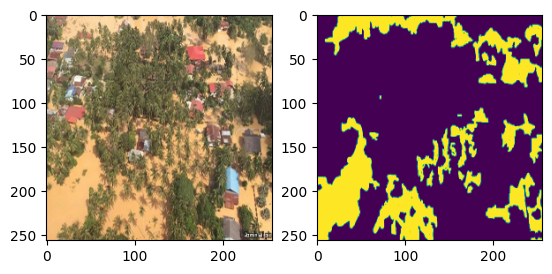

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow((sample_image).numpy().astype(np.uint8))
plt.subplot(1, 2, 2)
plt.imshow((sample_mask))

# 3. Data Preprocessing

## Task 8 - Image Resizing  
Resize the images and the masks.


In [ ]:
def resize(image, mask):
    image = tf.image.resize(image, (32, 32))
    mask = tf.image.resize(mask, (32, 32))
    return image, mask

## Task 9 - Image Normalizing  
Normalize the images and the masks.

In [ ]:
def normalize(image, mask):
    image = tf.cast(image, tf.float32) / 255.0
    mask = tf.cast(mask, tf.float32) / 255.0
    return image, mask

## Task 10 - Apply Preprocessing  
Write the `preprocessing()` function.

In [ ]:
batch = next(iter(train_ds.take(1)))
images, masks = batch[0], batch[1]
images.shape

2024-01-24 06:07:40.569834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype string and shape [35]
	 [[{{node Placeholder/_9}}]]
2024-01-24 06:07:40.570869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]


TensorShape([32, 256, 256, 3])

Take a look at the size of the images before applying preprocessing()

In [ ]:
def preprocessing(image, mask):
  image, mask = resize(image, mask)
  image, mask = normalize(image, mask)
  return image, mask

Apply the preprocessing function to the training and validation dataset.  

In [ ]:
train_ds = train_ds.map(lambda x, y: (preprocessing(x, y)), num_parallel_calls=tf.data.AUTOTUNE)
validation_ds = validation_ds.map(lambda x, y: (preprocessing(x, y)), num_parallel_calls=tf.data.AUTOTUNE)

Take a look at the size of the images after applying preprocessing()

In [ ]:
batch = next(iter(train_ds.take(1)))
images, masks = batch[0], batch[1]
images.shape

2024-01-24 06:07:43.421572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]
2024-01-24 06:07:43.422506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]


TensorShape([32, 32, 32, 3])

## Task 11 - Dataset Preprocessing Optimizations  
Apply caching and prefetching techniques to both training and validation dataset.

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 4. Understanding the U-NET Architecture

## Task 12 - The U-NET Architecture  
![unet](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)

# 5. Building the Model

## Task 13 - Double Convolution Block

In [ ]:
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = tf.keras.layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = tf.keras.layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

## Task 14 - Downsample Block

In [ ]:
def downsample_block(x, n_filters):
   # double convolution
   f = double_conv_block(x, n_filters)
   # maxpool
   p = tf.keras.layers.MaxPool2D(2)(f)
   # dropout
   p = tf.keras.layers.Dropout(0.3)(p)
   return f, p

## Task 15 - Upsample Block

In [ ]:
def upsample_block(x, conv_features, n_filters):
  # upsample
  x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
  # concatenate
  x = layers.concatenate([x, conv_features])
  # dropout
  x = layers.Dropout(0.3)(x)
  # Conv2D twice with ReLU activation
  x = double_conv_block(x, n_filters)
  return x

## Task 16 - Building U-NET Model

Write the `build_unet_model()` function.

In [ ]:
from tensorflow.keras import layers
def build_unet_model():
   inputs =layers.Input(shape=(32,32,3))
   # encoder: contracting path - downsample
   f1, p1 = downsample_block(inputs, 64)   # 1 - downsample
   f2, p2 = downsample_block(p1, 128)   # 2 - downsample
   f3, p3 = downsample_block(p2, 256)   # 3 - downsample
   f4, p4 = downsample_block(p3, 512)   # 4 - downsample

   bottleneck = double_conv_block(p4, 1024)   # 5 - bottleneck

   # decoder: expanding path - upsample
   u6 = upsample_block(bottleneck, f4, 512)   # 6 - upsample
   u7 = upsample_block(u6, f3, 256)   # 7 - upsample
   u8 = upsample_block(u7, f2, 128)   # 8 - upsample
   u9 = upsample_block(u8, f1, 64)   # 9 - upsample

   # outputs
   outputs = layers.Conv2D(3, 1, padding="same", activation = "softmax")(u9)

   # unet model with Keras Functional API
   unet_model = keras.Model(inputs, outputs, name="U-Net")
   return unet_model

Initialize unet model.

In [ ]:
unet_model = build_unet_model()

NameError: name 'keras' is not defined

## Task 17 - Compile the Model

In [ ]:
unet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Task 18 - Train the Model

In [ ]:
unet_model.fit(
   train_ds,
   validation_data=validation_ds,
   epochs=3
)

Epoch 1/3


2024-01-23 22:20:12.051729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]
2024-01-23 22:20:12.052699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [35]
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 1.1975 - accuracy: 0.2313 

2024-01-23 22:20:29.386428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]
2024-01-23 22:20:29.387030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 19s 3s/step - loss: 1.1975 - accuracy: 0.2313 - val_loss: 2.2207 - val_accuracy: 0.5765
Epoch 2/3


# 6. Making Predictions

## Task 19 - Making Predictions

In [ ]:
batch = next(iter(train_ds.take(1)))

images, masks = batch[0], batch[1]
predictions = unet_model.predict(images)

## Task 20 - Visualizing the Predictions

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(images[0]) # plot a sample image

plt.subplot(1, 2, 2)
plt.imshow(predictions[0]) # plot the corresponding prediction.

# 7. Congratulations!

Congrats, you have now understood the U-NET architecure and learned to implement it using Tensorflow and Keras.  
Try implementing more research papers to hone your Tensorflow skills.  

You can visit the [Educative projects home page](https://www.educative.io/learn/projects) for more exciting guided projects and courses to take your expertise to the next level.